# Classifying Edibility of Mushrooms

## Import Libraries

In [94]:
# Core
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing
import category_encoders as ce
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier

# Model Selection
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay

## Import Data

In [25]:
# Column Names
names = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

# Import from CSV
mush_df = pd.read_csv('data/agaricus-lepiota.csv', names=names, index_col=False)

# Show DF
mush_df

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Analysis

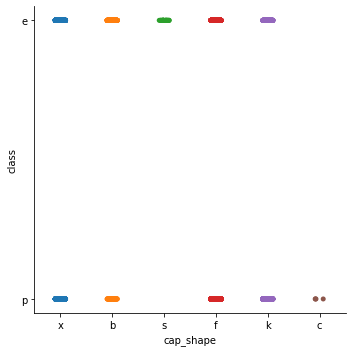

In [26]:
# Cap Shape
sns.catplot(data=mush_df, x='cap_shape', y='class')
plt.show()

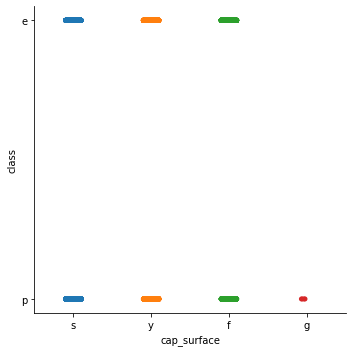

In [27]:
# Cap Surface
sns.catplot(data=mush_df, x='cap_surface', y='class')
plt.show()

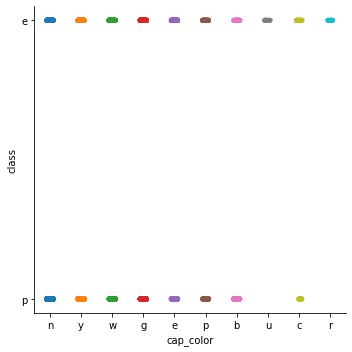

In [28]:
# Cap Color
sns.catplot(data=mush_df, x='cap_color', y='class')
plt.show()

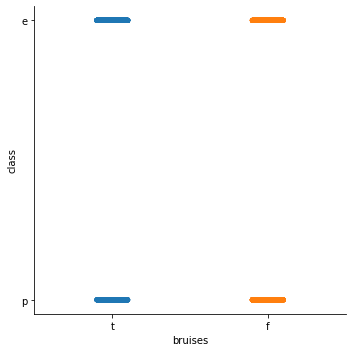

In [29]:
# Bruises
sns.catplot(data=mush_df, x='bruises', y='class')
plt.show()

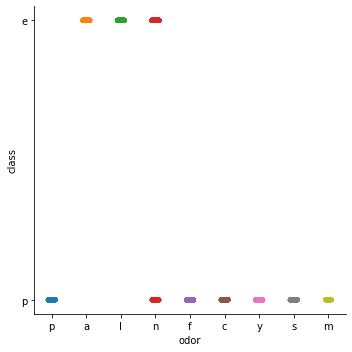

In [30]:
# Odor
sns.catplot(data=mush_df, x='odor', y='class')
plt.show()

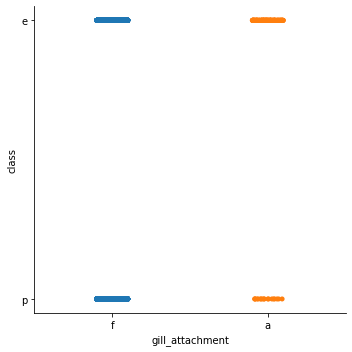

In [31]:
# Gill Attachment
sns.catplot(data=mush_df, x='gill_attachment', y='class')
plt.show()

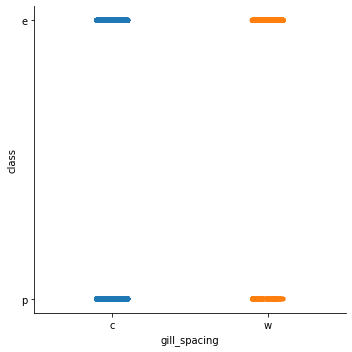

In [32]:
# Gill Spacing
sns.catplot(data=mush_df, x='gill_spacing', y='class')
plt.show()

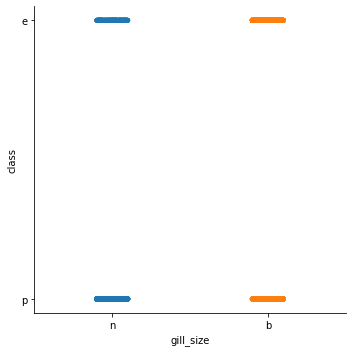

In [33]:
# Gill Size
sns.catplot(data=mush_df, x='gill_size', y='class')
plt.show()

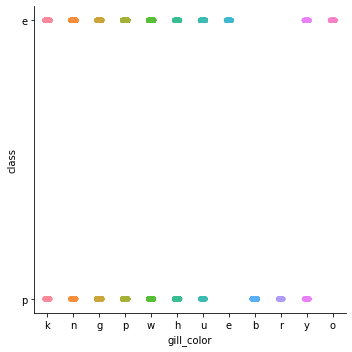

In [34]:
# Gill Color
sns.catplot(data=mush_df, x='gill_color', y='class')
plt.show()

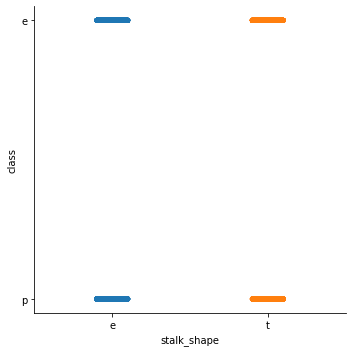

In [35]:
# Stalk Shape
sns.catplot(data=mush_df, x='stalk_shape', y='class')
plt.show()

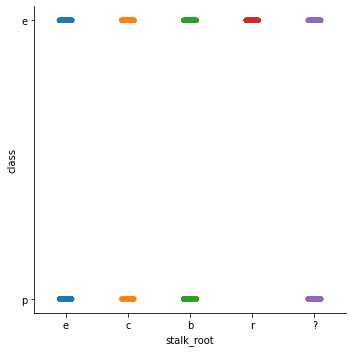

In [36]:
# Stalk Root
sns.catplot(data=mush_df, x='stalk_root', y='class')
plt.show()

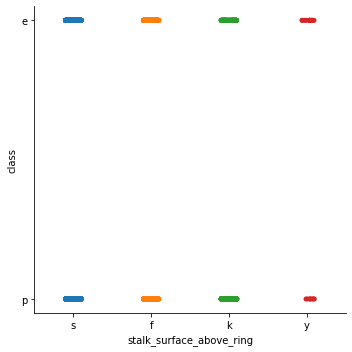

In [38]:
# Stalk Surface Above
sns.catplot(data=mush_df, x='stalk_surface_above_ring', y='class')
plt.show()

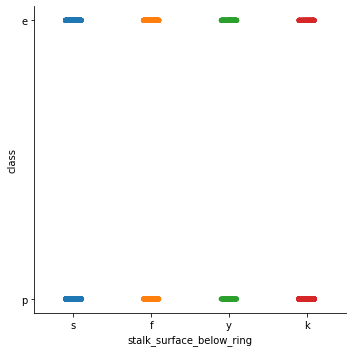

In [39]:
# Stalk Surface Below
sns.catplot(data=mush_df, x='stalk_surface_below_ring', y='class')
plt.show()

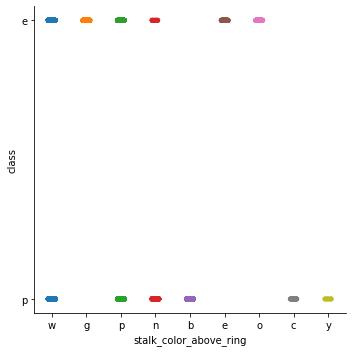

In [40]:
# Stalk Color Above
sns.catplot(data=mush_df, x='stalk_color_above_ring', y='class')
plt.show()

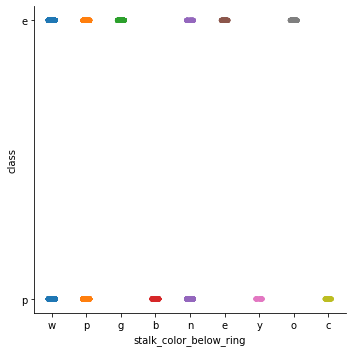

In [41]:
# Stalk Color Below
sns.catplot(data=mush_df, x='stalk_color_below_ring', y='class')
plt.show()

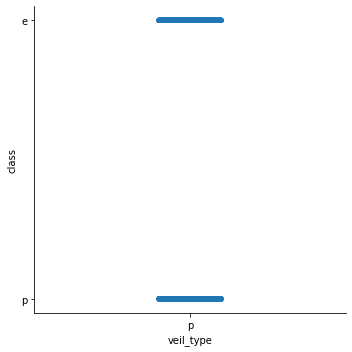

In [42]:
# Veil Type
sns.catplot(data=mush_df, x='veil_type', y='class')
plt.show()

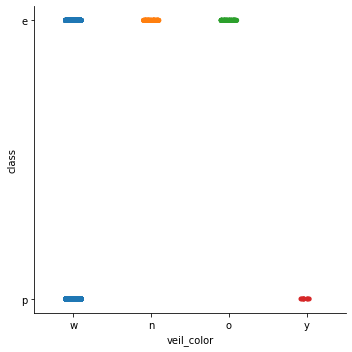

In [43]:
# Veil Color
sns.catplot(data=mush_df, x='veil_color', y='class')
plt.show()

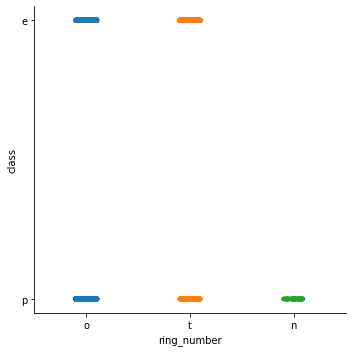

In [44]:
# Ring Number
sns.catplot(data=mush_df, x='ring_number', y='class')
plt.show()

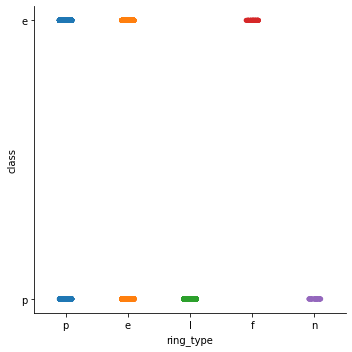

In [45]:
# Ring Type
sns.catplot(data=mush_df, x='ring_type', y='class')
plt.show()

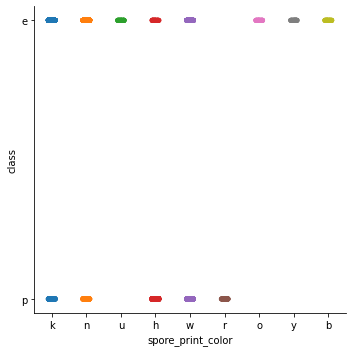

In [46]:
# Spore Print Color
sns.catplot(data=mush_df, x='spore_print_color', y='class')
plt.show()

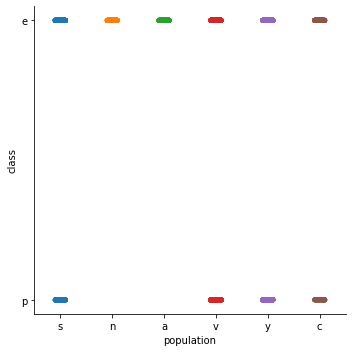

In [47]:
# Population
sns.catplot(data=mush_df, x='population', y='class')
plt.show()

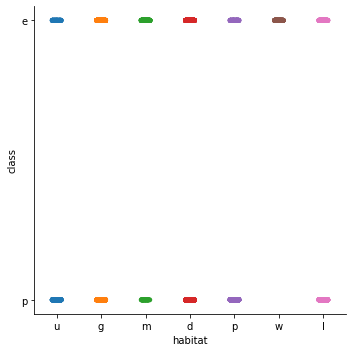

In [48]:
# Habitat
sns.catplot(data=mush_df, x='habitat', y='class')
plt.show()

## Select Features

In [50]:
mush_df = mush_df[['class', 'cap_shape', 'cap_surface', 'cap_color', 'odor', 'gill_color', 'stalk_shape', 'stalk_root','stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']]

mush_df

,class,cap_shape,cap_surface,cap_color,odor,gill_color,stalk_shape,stalk_root,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,p,k,e,e,w,w,w,o,p,k,s,u
1,e,x,s,y,a,k,e,c,w,w,w,o,p,n,n,g
2,e,b,s,w,l,n,e,c,w,w,w,o,p,n,n,m
3,p,x,y,w,p,n,e,e,w,w,w,o,p,k,s,u
4,e,x,s,g,n,k,t,e,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,n,y,e,?,o,o,o,o,p,b,c,l
8120,e,x,s,n,n,y,e,?,o,o,n,o,p,b,v,l
8121,e,f,s,n,n,n,e,?,o,o,o,o,p,b,c,l
8122,p,k,y,n,y,b,t,?,w,w,w,o,e,w,v,l


## Pre-Processing

In [65]:
# Convert To Numbers
mush_df = mush_df.apply(lambda x: pd.factorize(x)[0])

# Category Encoding
encoder = ce.OneHotEncoder(cols=list(mush_df.drop('class', axis=1)))
mush_df_enc = encoder.fit_transform(mush_df)
mush_df_enc

,class,cap_shape_1,cap_shape_2,cap_shape_3,cap_shape_4,cap_shape_5,cap_shape_6,cap_surface_1,cap_surface_2,cap_surface_3,...,population_4,population_5,population_6,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6,habitat_7
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8120,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8121,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8122,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [67]:
# Split Target from Features
x = mush_df_enc.drop('class', axis=1)
y = mush_df_enc['class']

In [69]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [74]:
# Check Shapes
print("Train Feat Shape: ", x_train.shape)
print("Train Targ Shape: ",y_train.shape)

print("Test Feat Shape: ", x_test.shape)
print("Train Targ Shape: ",y_test.shape)

Train Feat Shape:  (6499, 100)
Train Targ Shape:  (6499,)
Test Feat Shape:  (1625, 100)
Train Targ Shape:  (1625,)


## Model Optimisation

In [84]:
# Parameter Grid
rf_grid = {
    "n_estimators": [10, 50, 100],
    "criterion": ['entropy', 'gini'],
    "max_depth": [1, 10, 100, 1000, None],
    "min_samples_split": [2, 10, 20, 30, 40],
    "min_samples_leaf": [1, 5, 10, 20],
    "max_features":['auto']
}

In [85]:
rf = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid=rf_grid,
                  cv=3,
                  n_jobs=4,
                  scoring='f1')

# Grid Search
rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 10, 100, 1000, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 10, 20, 30, 40],
                         'n_estimators': [10, 50, 100]},
             scoring='f1')

In [86]:
rf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

## Evaluation

In [89]:
# Retrain Best Model
best_rf = RandomForestClassifier(criterion='entropy',
                                 max_depth=10,
                                 max_features='auto',
                                 min_samples_leaf=1,
                                 min_samples_split=2,
                                 n_estimators=100)

best_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [90]:
# Get Training and Test Scores
dt_pred_train = best_rf.predict(x_train)
dt_pred_test = best_rf.predict(x_test)

print("Train Accuracy Score: ", accuracy_score(y_train, dt_pred_train))
print("Test Accuracy Score: ", accuracy_score(y_test, dt_pred_test))

print("Train F1 Score: ", f1_score(y_train, dt_pred_train, average='macro'))
print("Test F1 Score: ", f1_score(y_test, dt_pred_test, average='macro'))

Train Accuracy Score:  1.0
Test Accuracy Score:  1.0
Train F1 Score:  1.0
Test F1 Score:  1.0


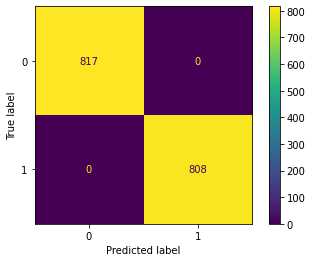

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_pred_test)
plt.show()